# Import

In [20]:
%matplotlib inline
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

from matplotlib import pyplot as plt

import numpy as np


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Three ways to corrupt input:
## Salt and pepper noise: randomly change some of the original data point to minimum or maximum

In [21]:
def salt_and_pepper_noise(input, v):
    
    
    #Apply salt and pepper noise to data in input, in other words a fraction v of elements of input (chosen at random) is set to its maximum or minimum value according to a fair coin flip.
    #If minimum or maximum are not given, the min (max) value in input is taken.
    #param input: array_like, Input data
    #param v: int, fraction of elements to distort
    #return: transformed data
    
    
    input_noise = input.copy()
    #shape(input) is (sample_size,number_of_features)
    n_features = input.shape[1]

    mn = input.min()
    mx = input.max()

    for i, sample in enumerate(input):
        #randomly generate a array-like mask with a length as v
        mask = np.random.randint(0, n_features, v)

        for m in mask:
            #set the mask point to minimum or maximum according to a Bernoulli(0.5)
            if np.random.random() < 0.50:
                input_noise[i][m] = mn
            else:
                input_noise[i][m] = mx

    return input_noise

## Masking Noise: Randomly select a fraction of input and force them to zero

In [22]:
def masking_noise(input, v):
    
    
     
    #Apply masking noise to data in input, in other words a fraction v of elements of input (chosen at random) is forced to zero.

    #param input: array_like, Input data
    #param v: int, fraction of elements to distort
    #return: transformed data

    input_noise = input.copy()

    n_samples = input.shape[0]
    n_features = input.shape[1]

    for i in range(n_samples):
        mask = np.random.randint(0, n_features, v)
        #set all masked data points to be zero
        for m in mask:
            input_noise[i][m] = 0.

    return input_noise

## Corrupt: The original input elements are forced to zero, kept the same or multiplied by 2

In [23]:
def corrupt_x(x):
    
    #Multiplied the input with a random int matrix with the same shape generated from [0,1,2] to add more randomness to the input
    #Add this function in the structure of tensorflow to avoid overfitting
    
    #print('x')
    #print(x)
    
    c = tf.random_uniform(shape=tf.shape(x),  minval=0, maxval=2, dtype=tf.int32)
    #to do multiplication, first need to convert the data to the same type which is tf.float32
    x_tilde = x * tf.cast(c, tf.float32)
    
    #print('x_tilde')
    #print(x_tilde)
    
    return x_tilde

# Image Summary for Tensorboard

In [24]:
def image_summary(label, tensor):
    # https://www.tensorflow.org/api_docs/python/tf/summary/image
    #tf.summary.image itself takes an identifier (we call it label) and the tensor of images
    tensor_reshaped = tf.reshape(tensor, [-1, 28, 28, 1])
    return tf.summary.image(label, tensor_reshaped)

# Main Function

0


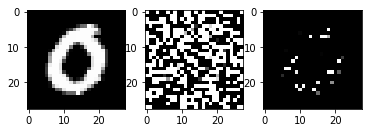

6


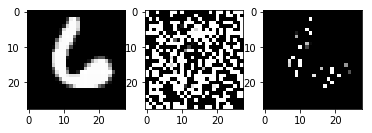

2


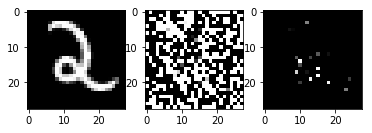

0


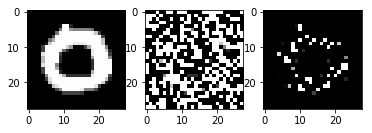

6


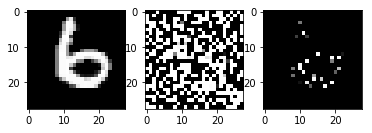

9


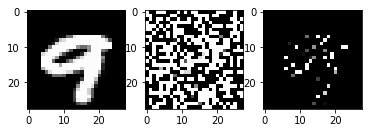

4


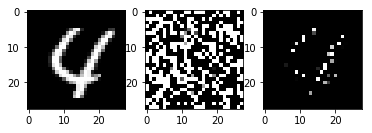

2


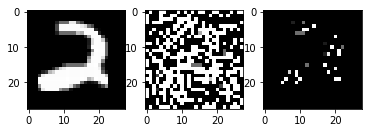

8


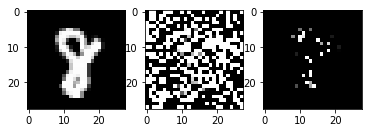

6


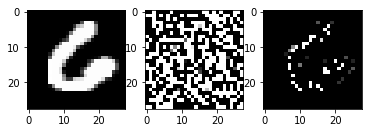

5


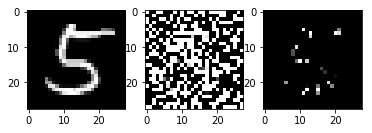

4


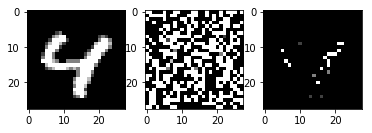

3


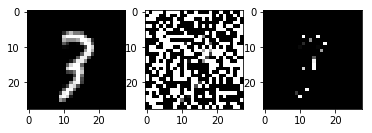

3


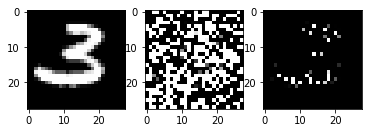

3


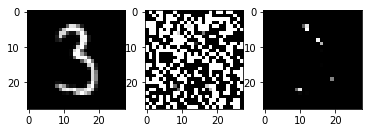

9


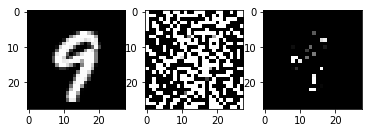

0


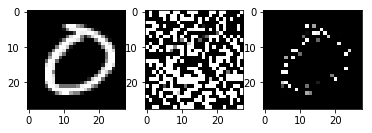

3


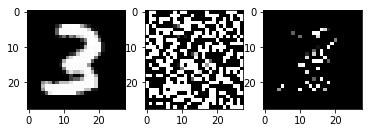

3


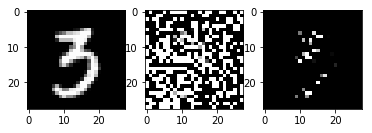

0


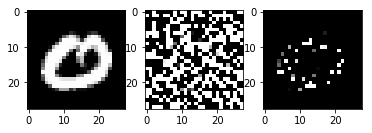

In [29]:
if __name__ == '__main__':

    v = 50
    start = 3000

    for i in range(20):
        
        print(np.argmax(mnist.train.labels[start+i]))
        
        x_orig = mnist.train.images[start+i]

        plt.subplot(1,3,1)
        plt.imshow(x_orig.reshape((28,28)), cmap=plt.cm.gray)
        
        plt.subplot(1,3,2)
        x_tilde1 = salt_and_pepper_noise(x_orig.reshape((28,28)), v)
        plt.imshow(x_tilde1, cmap=plt.cm.gray)
        
        plt.subplot(1,3,3)
        x_tilde2 = masking_noise(x_orig.reshape((28,28)), v)
        plt.imshow(x_tilde2, cmap=plt.cm.gray)
        
        plt.show()